In [13]:
import pandas as pd

# Load the TSV file
df = pd.read_csv("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz.tsv", sep='\t')

df.drop(columns=['sampleset'], inplace=True)

# Add 'sub-' prefix to FID values
df['FID'] = df['FID'].apply(lambda x: f"sub-{x}")
df.rename(columns={'FID': 'participant_id'}, inplace=True)

# Save the cleaned DataFrame back to a TSV file
df.to_csv("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_2.tsv", sep='\t', index=False)


In [24]:
import pandas as pd

# === Input paths ===
original_tsv_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_2.tsv"
reference_csv_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes.csv"  
output_csv_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_final.tsv"

# === Load files ===
df = pd.read_csv(original_tsv_path, sep='\t')
reference_df = pd.read_csv(reference_csv_path)

# Align index and drop missing IDs
df = df.set_index('participant_id')
reference_ids = reference_df['participant_id'].values

# Get valid IDs only
valid_ids = df.index.intersection(reference_ids)
missing_ids = set(reference_ids) - set(valid_ids)

print(f"Dropped {len(missing_ids)} participant_ids not found in the data.")

# Safely reindex and keep as DataFrame
df = pd.DataFrame(df.loc[valid_ids])  # this avoids the internal NumPy bug
df.index.name = 'participant_id'
df.reset_index(inplace=True)  # safe now

# === Save final file
df.to_csv(output_csv_path, index=False)

Dropped 1119 participant_ids not found in the data.


AttributeError: module 'numpy' has no attribute 'matrix'

In [19]:
import pandas as pd

reference_csv_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_tiv_volumes.csv"
reference_df = pd.read_csv(reference_csv_path, encoding='utf-8', engine='python')

print("Raw columns:", list(reference_df.columns))


Raw columns: ['participant_id', 'volume']


In [27]:
import pandas as pd

# Load the TSV file (tab-separated)
df = pd.read_csv("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_2.tsv", sep='\t')

# Drop index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Save as comma-separated CSV
df.to_csv("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_final.csv", index=False)


In [31]:
import pandas as pd


sum_source_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_final.csv" 
target_csv_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/participants_sex_age.csv"  
output_csv_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_sex_age.csv"  

# === Load both files ===
df_sum = pd.read_csv(sum_source_path)
df_target = pd.read_csv(target_csv_path)

# === Rename 'Subject' to 'participant_id' for merge
df_target = df_target.rename(columns={"Subject": "participant_id"})

# === Merge on 'participant_id'
df_merged = df_target.merge(df_sum[['participant_id', 'SUM']], on='participant_id', how='left')

# === Drop rows with missing SUM
df_filtered = df_merged.dropna(subset=['SUM'])

# === Rename 'SUM' to 'PGS'
df_filtered = df_filtered.rename(columns={'SUM': 'PGS'})

# === Report count
print(f"Kept {len(df_filtered)} rows with PGS values out of {len(df_merged)} total.")

# === Save final result
df_filtered.to_csv(output_csv_path, index=False)


Kept 41669 rows with PGS values out of 42786 total.


In [42]:
pip install numpy==1.26.4


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



Train distribution (strata proportions):
strata
0_(43.999, 58.0]_(0.616, 5.296]       0.040768
0_(43.999, 58.0]_(-0.0311, 0.616]     0.039388
0_(64.0, 70.0]_(-0.667, -0.0311]      0.036538
0_(64.0, 70.0]_(-3.642, -0.667]       0.036448
0_(43.999, 58.0]_(-0.667, -0.0311]    0.036418
0_(43.999, 58.0]_(-3.642, -0.667]     0.035428
1_(64.0, 70.0]_(-3.642, -0.667]       0.035218
0_(64.0, 70.0]_(-0.0311, 0.616]       0.035098
0_(64.0, 70.0]_(0.616, 5.296]         0.033688
1_(64.0, 70.0]_(-0.0311, 0.616]       0.033448
0_(58.0, 64.0]_(-0.667, -0.0311]      0.033448
1_(70.0, 82.0]_(-3.642, -0.667]       0.033388
1_(64.0, 70.0]_(-0.667, -0.0311]      0.033178
0_(58.0, 64.0]_(0.616, 5.296]         0.033088
0_(58.0, 64.0]_(-0.0311, 0.616]       0.032518
0_(58.0, 64.0]_(-3.642, -0.667]       0.031948
1_(70.0, 82.0]_(-0.667, -0.0311]      0.031768
1_(64.0, 70.0]_(0.616, 5.296]         0.030898
1_(43.999, 58.0]_(0.616, 5.296]       0.030298
1_(70.0, 82.0]_(-0.0311, 0.616]       0.029519
1_(70.0, 82

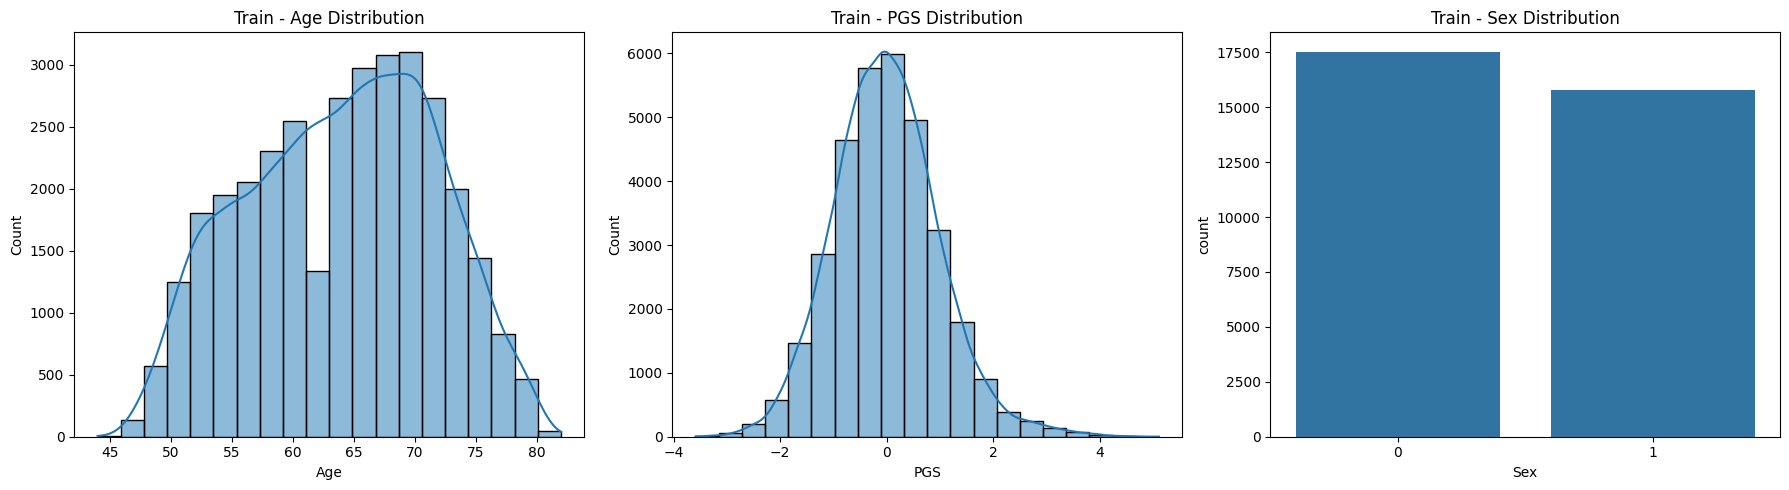

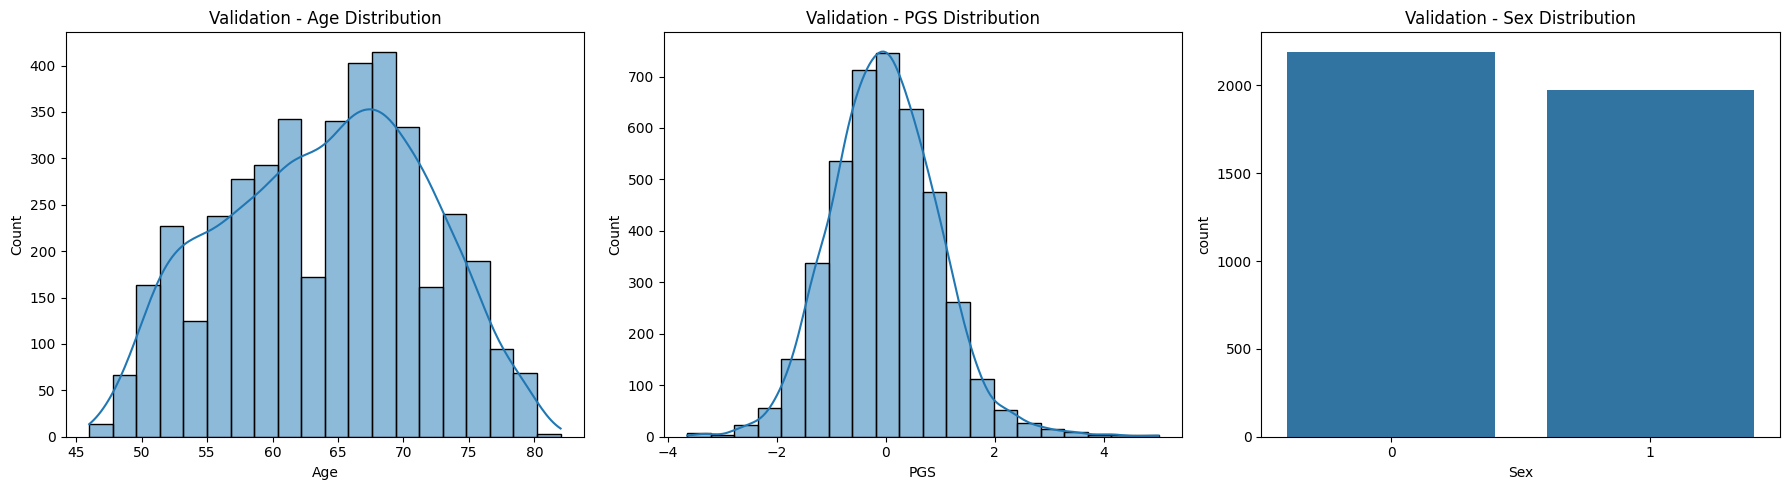

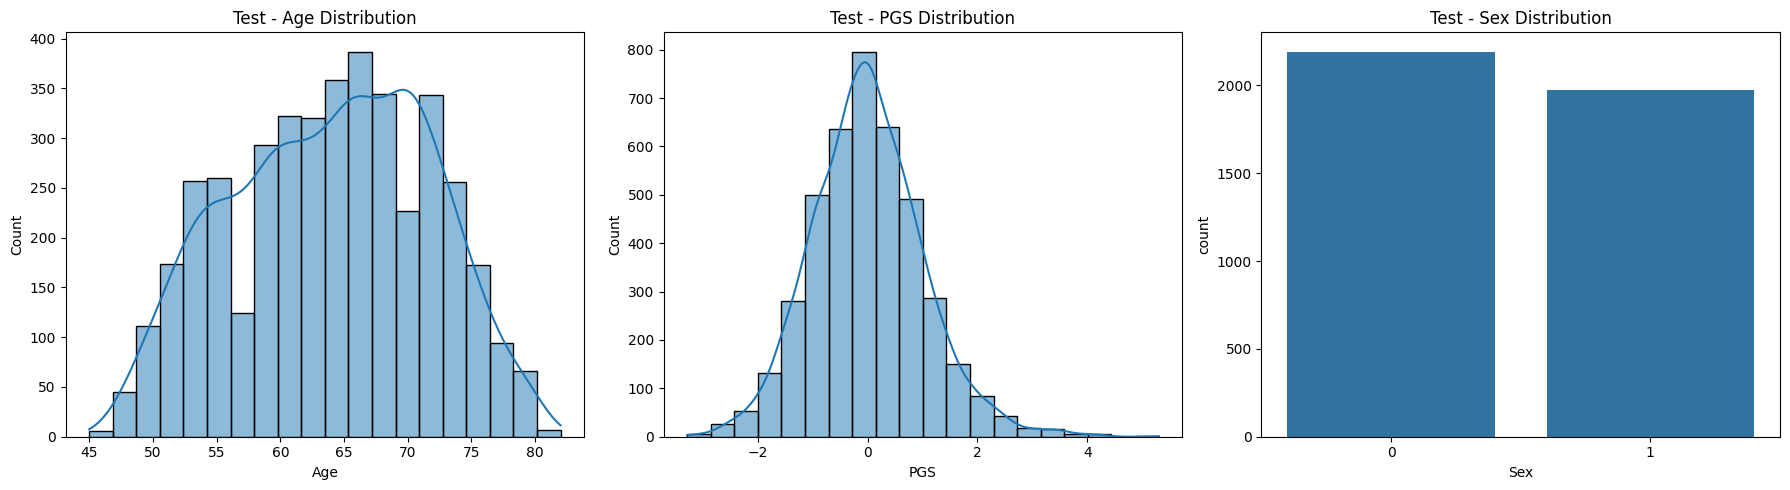

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

# === File paths ===
input_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_sex_age_zscore.csv"
output_dir = "/neurospin/dico/data/deep_folding/current/datasets/orbital_patterns/Troiani/PGS/"

# === Load CSV
df = pd.read_csv(input_path)

# === Bin Age and PGS (use string bins to avoid NumPy issues)
df = df.assign(
    age_bin=pd.qcut(df['Age'], q=4, duplicates='drop').astype(str),
    pgs_bin=pd.qcut(df['PGS'], q=4, duplicates='drop').astype(str)
)

# === Create stratification key
df['strata'] = df['Sex'].astype(str) + "_" + df['age_bin'] + "_" + df['pgs_bin']

# === Split into Train (80%), Validation (10%), and Test (10%)
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['strata'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['strata'], random_state=42)

# === Save Train / Val / Test splits (only participant_id)
train_df[['participant_id']].to_csv(f"{output_dir}PGS_subjects_train.csv", index=False)
val_df[['participant_id']].to_csv(f"{output_dir}PGS_subjects_val.csv", index=False)
test_df[['participant_id']].to_csv(f"{output_dir}PGS_subjects_test.csv", index=False)

# === Save combined Train+Val set
train_val_df = pd.concat([train_df, val_df], ignore_index=True)
train_val_df[['participant_id']].to_csv(f"{output_dir}PGS_subjects_train_val.csv", index=False)

# === 5-Fold Stratified Validation from val_df
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i, (_, fold_idx) in enumerate(skf.split(val_df, val_df['strata'])):
    val_fold = val_df.iloc[fold_idx]
    val_fold[['participant_id']].to_csv(f"{output_dir}PGS_subjects_val_fold_{i+1}.csv", index=False)

# === Distribution summary
def print_distribution(name, subset):
    print(f"\n{name} distribution (strata proportions):")
    print(subset['strata'].value_counts(normalize=True))

print_distribution("Train", train_df)
print_distribution("Validation", val_df)
print_distribution("Test", test_df)

# === Plot distributions
def plot_distributions(name, subset):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(subset['Age'], bins=20, kde=True, ax=axs[0])
    axs[0].set_title(f"{name} - Age Distribution")

    sns.histplot(subset['PGS'], bins=20, kde=True, ax=axs[1])
    axs[1].set_title(f"{name} - PGS Distribution")

    sns.countplot(x='Sex', data=subset, ax=axs[2])
    axs[2].set_title(f"{name} - Sex Distribution")

    plt.tight_layout()
    plt.show()

# === Show plots
plot_distributions("Train", train_df)
plot_distributions("Validation", val_df)
plot_distributions("Test", test_df)


In [11]:
import pandas as pd

# === Paths
input_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_sex_age.csv"
output_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_sex_age_zscore.csv"

# === Load data
df = pd.read_csv(input_path)

# === Statistics before normalization
mean_before = df['PGS'].mean()
std_before = df['PGS'].std()
min_before = df['PGS'].min()
max_before = df['PGS'].max()

print("📊 Statistics BEFORE normalization:")
print(f"Mean:  {mean_before:.4f}")
print(f"Std:   {std_before:.4f}")
print(f"Min:   {min_before:.4f}")
print(f"Max:   {max_before:.4f}")

# === Z-score normalization
df['PGS'] = (df['PGS'] - mean_before) / std_before

# === Statistics after normalization
mean_after = df['PGS'].mean()
std_after = df['PGS'].std()
min_after = df['PGS'].min()
max_after = df['PGS'].max()

print("\n📊 Statistics AFTER normalization:")
print(f"Mean:  {mean_after:.4f}")
print(f"Std:   {std_after:.4f}")
print(f"Min:   {min_after:.4f}")
print(f"Max:   {max_after:.4f}")

# === Save updated CSV
df.to_csv(output_path, index=False)
print(f"\n✅ Z-scored data saved to:\n{output_path}")


📊 Statistics BEFORE normalization:
Mean:  0.0254
Std:   0.3017
Min:   -1.0731
Max:   1.6233

📊 Statistics AFTER normalization:
Mean:  -0.0000
Std:   1.0000
Min:   -3.6408
Max:   5.2959

✅ Z-scored data saved to:
/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_sex_age_zscore.csv


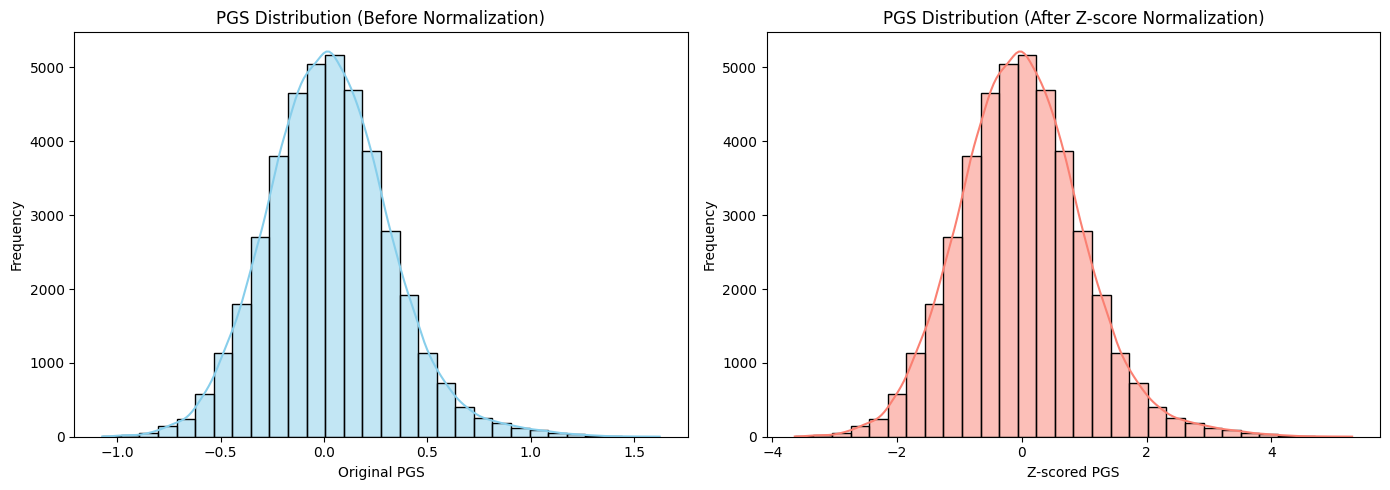

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Paths
input_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_sex_age.csv"
output_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Input/UKB_pgs_scz_sex_age_zscore.csv"

# === Load before and after data
df_before = pd.read_csv(input_path)
df_after = pd.read_csv(output_path)

# === Plot before and after distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Before normalization
sns.histplot(df_before['PGS'], bins=30, kde=True, ax=axs[0], color='skyblue')
axs[0].set_title("PGS Distribution (Before Normalization)")
axs[0].set_xlabel("Original PGS")
axs[0].set_ylabel("Frequency")

# After normalization
sns.histplot(df_after['PGS'], bins=30, kde=True, ax=axs[1], color='salmon')
axs[1].set_title("PGS Distribution (After Z-score Normalization)")
axs[1].set_xlabel("Z-scored PGS")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
